# Uniaxial Materials

The `UniaxialMaterial` object has the following methods:

> ```python
> setTrialStrain(strain: float) -> float
> getStress() -> float
> getStress(strain: float, commit: bool =False) -> float
> getTangent() -> float
> getDampTangent() -> float
> getStrainRate() -> float
> commitState() -> int
> revertToStart() -> int
> revertToLastCommit() -> int
> ```

In [1]:
from opensees import uniaxial
from opensees.units.english import ksi, psi, inch, ft

import numpy as np
from numpy import sin, linspace, pi, sqrt

import matplotlib.pyplot as plt
plt.style.use("typewriter")

## Plasticity

In [2]:
Fy  = 66.8*ksi             # steel yield stress
Es  = 29000.*ksi           # modulus of steel

<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1373b133b0> <ElasticPP object at 0x7f1373ae25e0> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1373735370> <HardeningMaterial object at 0x7f1373b39eb0> 1


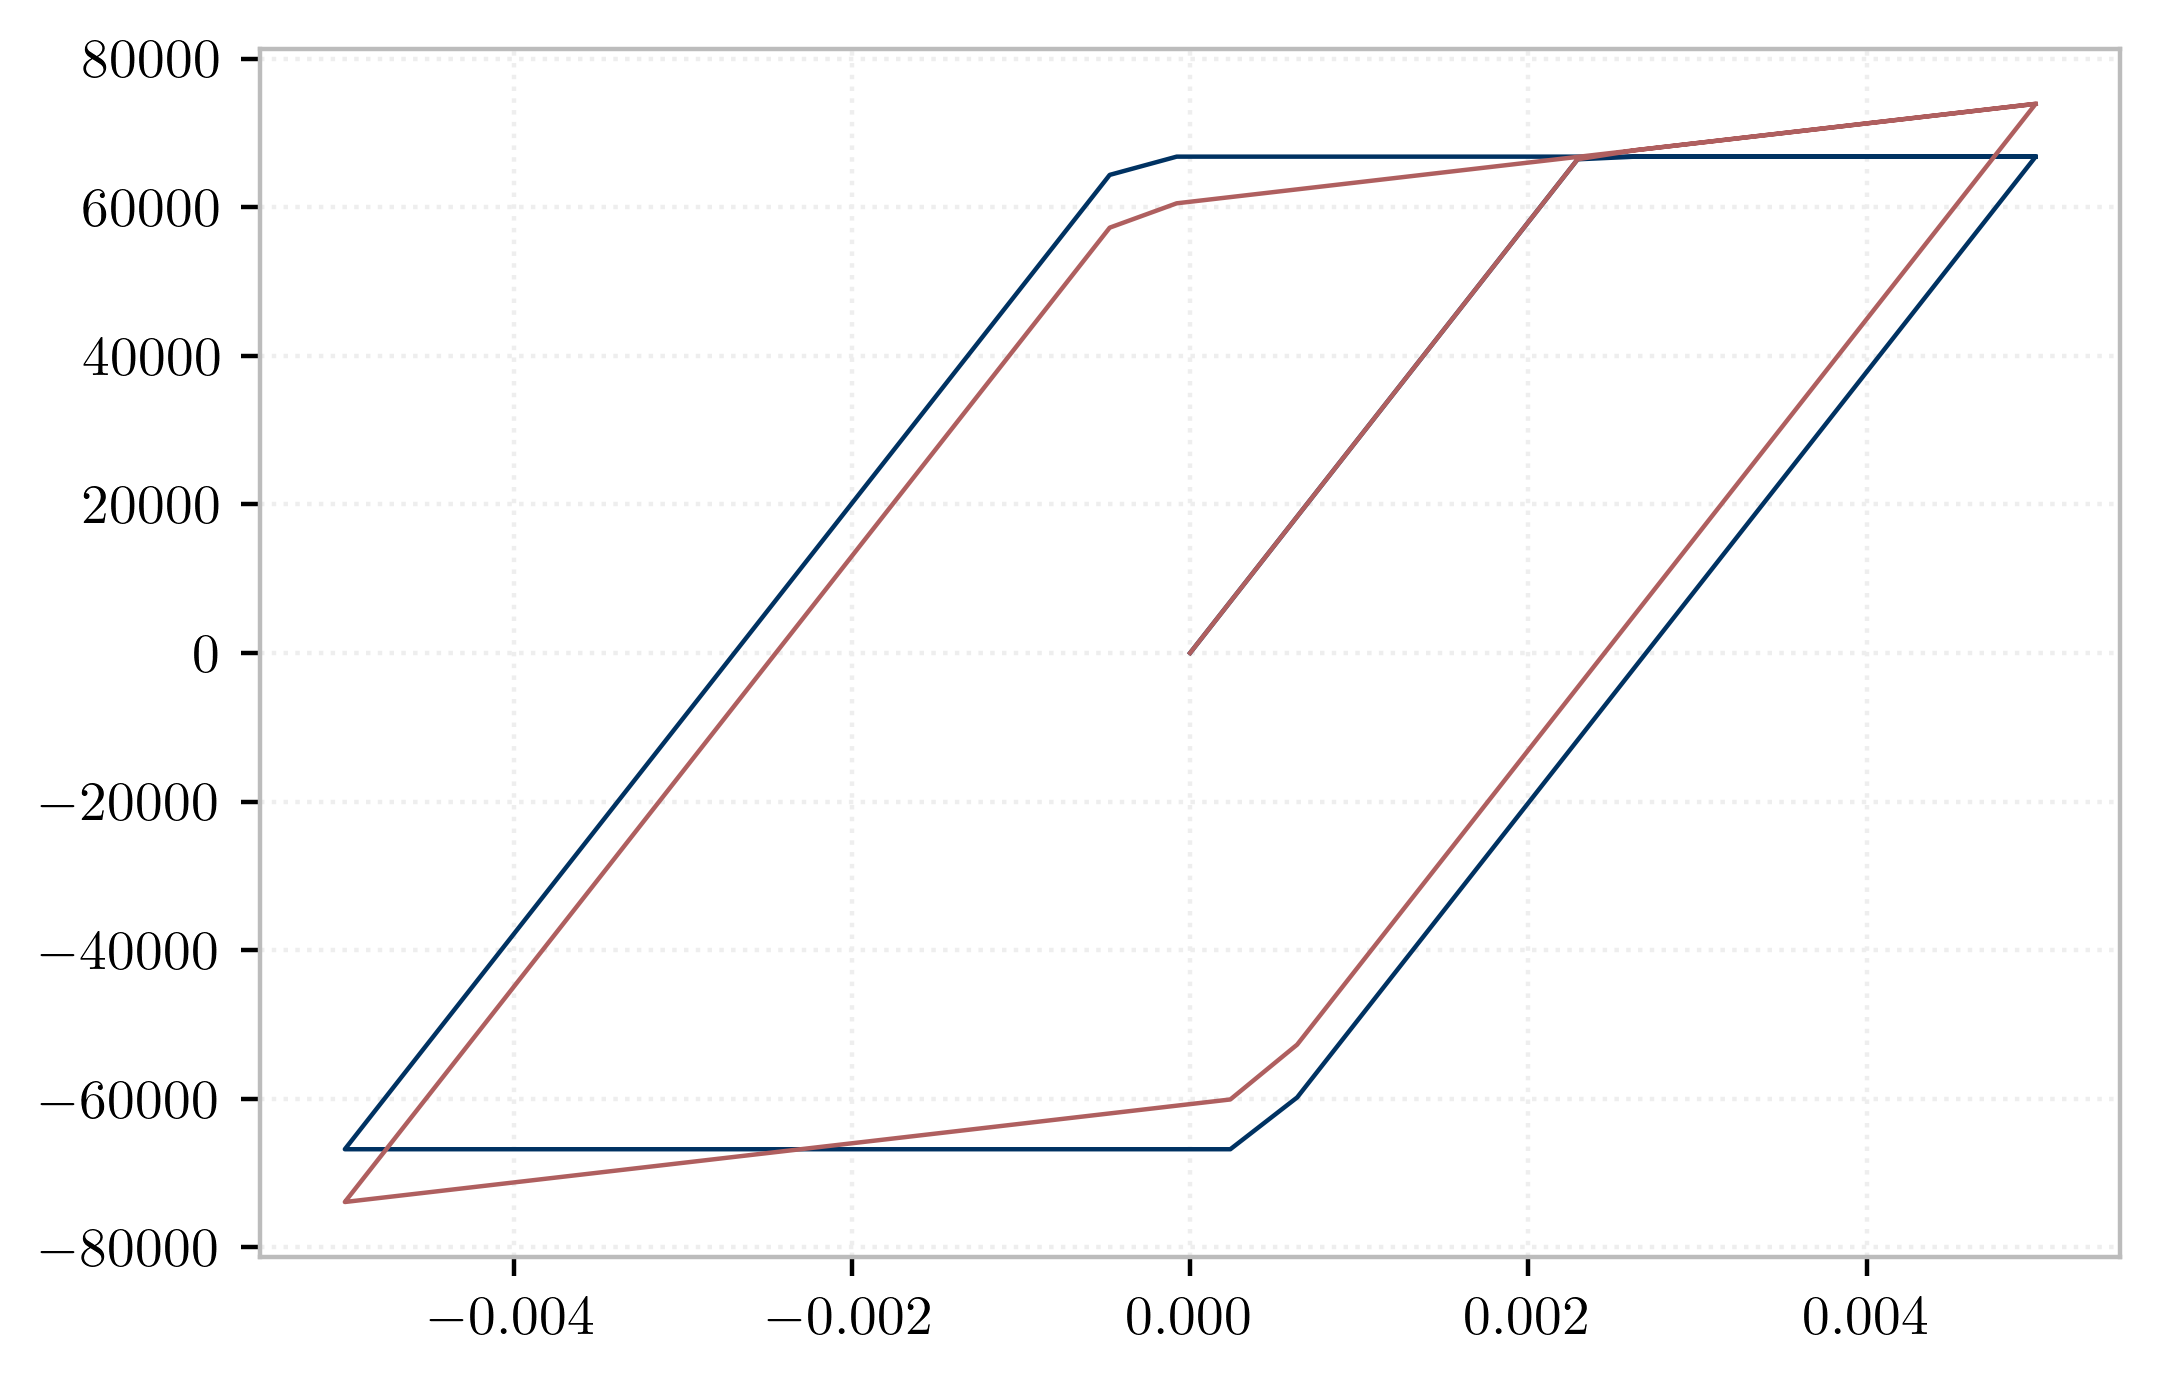

In [3]:
fig, ax = plt.subplots()

strain = 0.005*sin(linspace(0, 2.5*pi, 100))

with uniaxial.ElasticPP(1, Es, Fy/Es) as mat:
    stress = [mat.getStress(e, commit=True) for e in strain]
    ax.plot(strain, stress, label="ElasticPP")

with uniaxial.Hardening(1, Es, Fy, 0.0*Es, 0.1*Es) as mat:
    ax.plot(strain, [mat.getStress(e, commit=True) for e in strain], label="Hardening")


## Steel

In [4]:
Bs  = 0.005                # strain-hardening ratio 
R0  = 18                   # control the transition from elastic to plastic branches
cR1 = 0.925                # "
cR2 = 0.15                 # "

In [5]:
tangent = []

#                     no tag needed
steel = uniaxial.Steel02(None, Fy, Es, 0.05, R0=R0)


strain = 0.005*sin(linspace(0, 2.5*pi, 100))


with steel as mat:
    for e in strain:
        mat.setTrialStrain(e)
        Et = mat.getTangent()
        tangent.append(Et)
        mat.commitState()

<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f13928d7d30> <Steel02 object at 0x7f13928cc540> 1


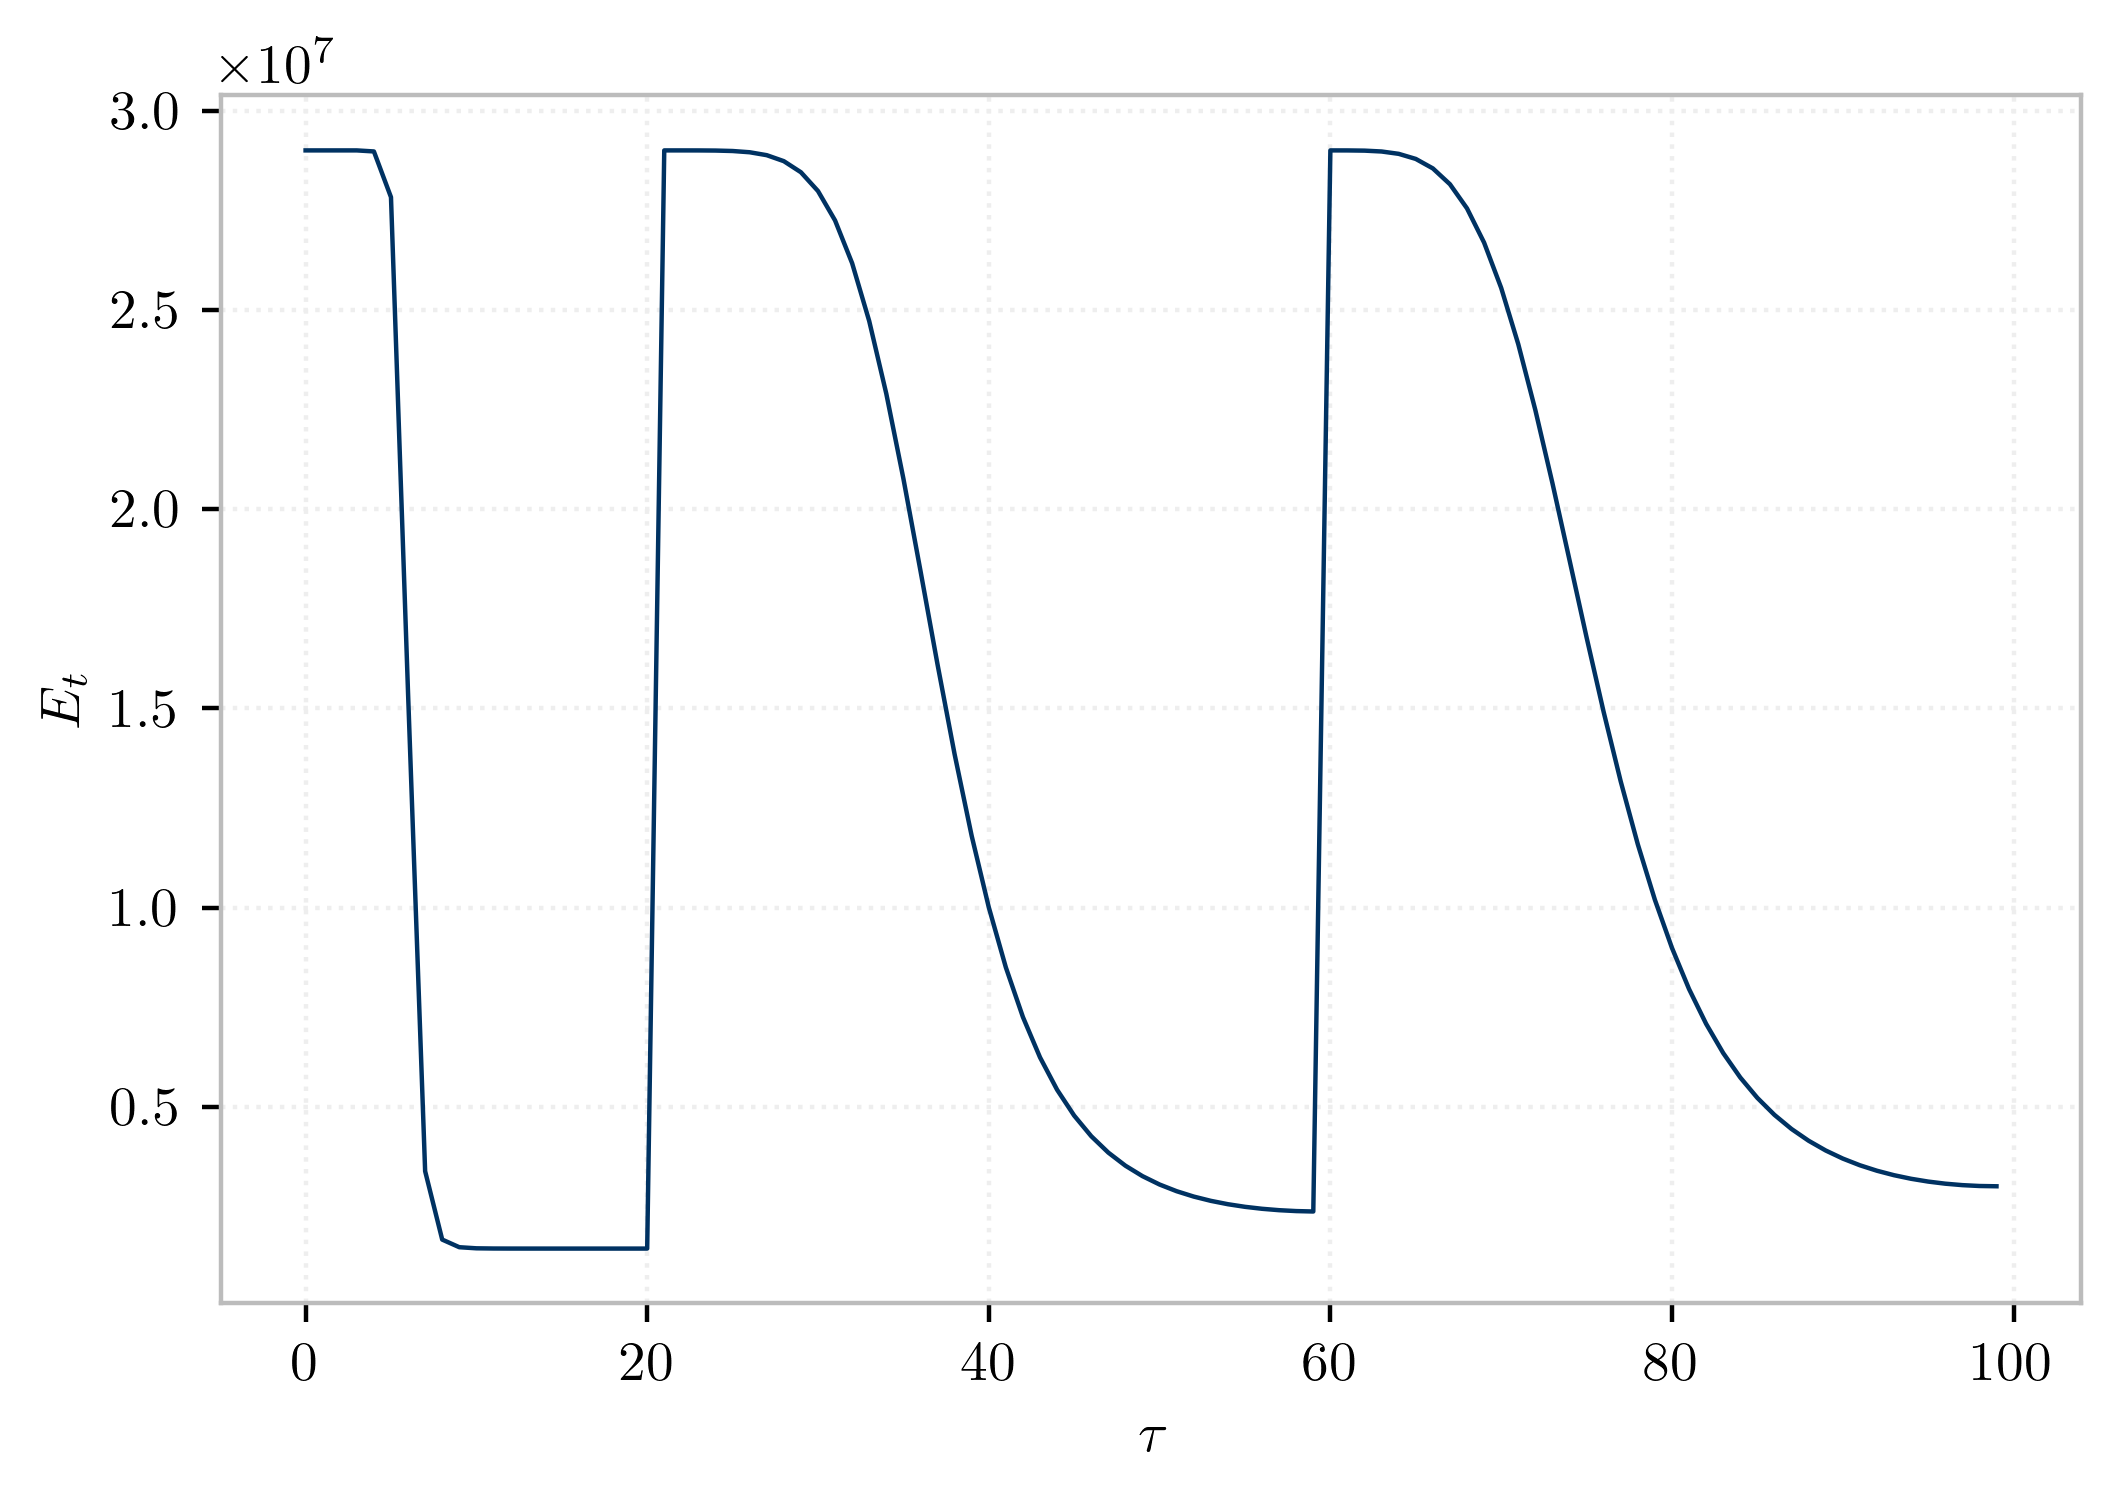

In [6]:
fig, ax = plt.subplots()
ax.plot(tangent)
ax.set_ylabel("$E_t$")
ax.set_xlabel(r"$\tau$");

<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1392bbc470> <ElasticPP object at 0x7f1392be9820> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1392bcc2f0> <HardeningMaterial object at 0x7f1392bdf190> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1392bbad70> <Steel02 object at 0x7f13928cc9c0> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1392bccdf0> <RambergOsgoodSteel object at 0x7f1392bcf2e0> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1373b08d70> <Dodd_Restrepo object at 0x7f13928cccc0> 1


RambergOsgoodSteel unaxial material - Written by R.Rahimi & R.Sepasdar & Dr. Mo. R. Banan Shiraz University Copyright 2012; 
Dodd_Restrepo unaxial material - Written by L.L. Dodd & J. Restepo


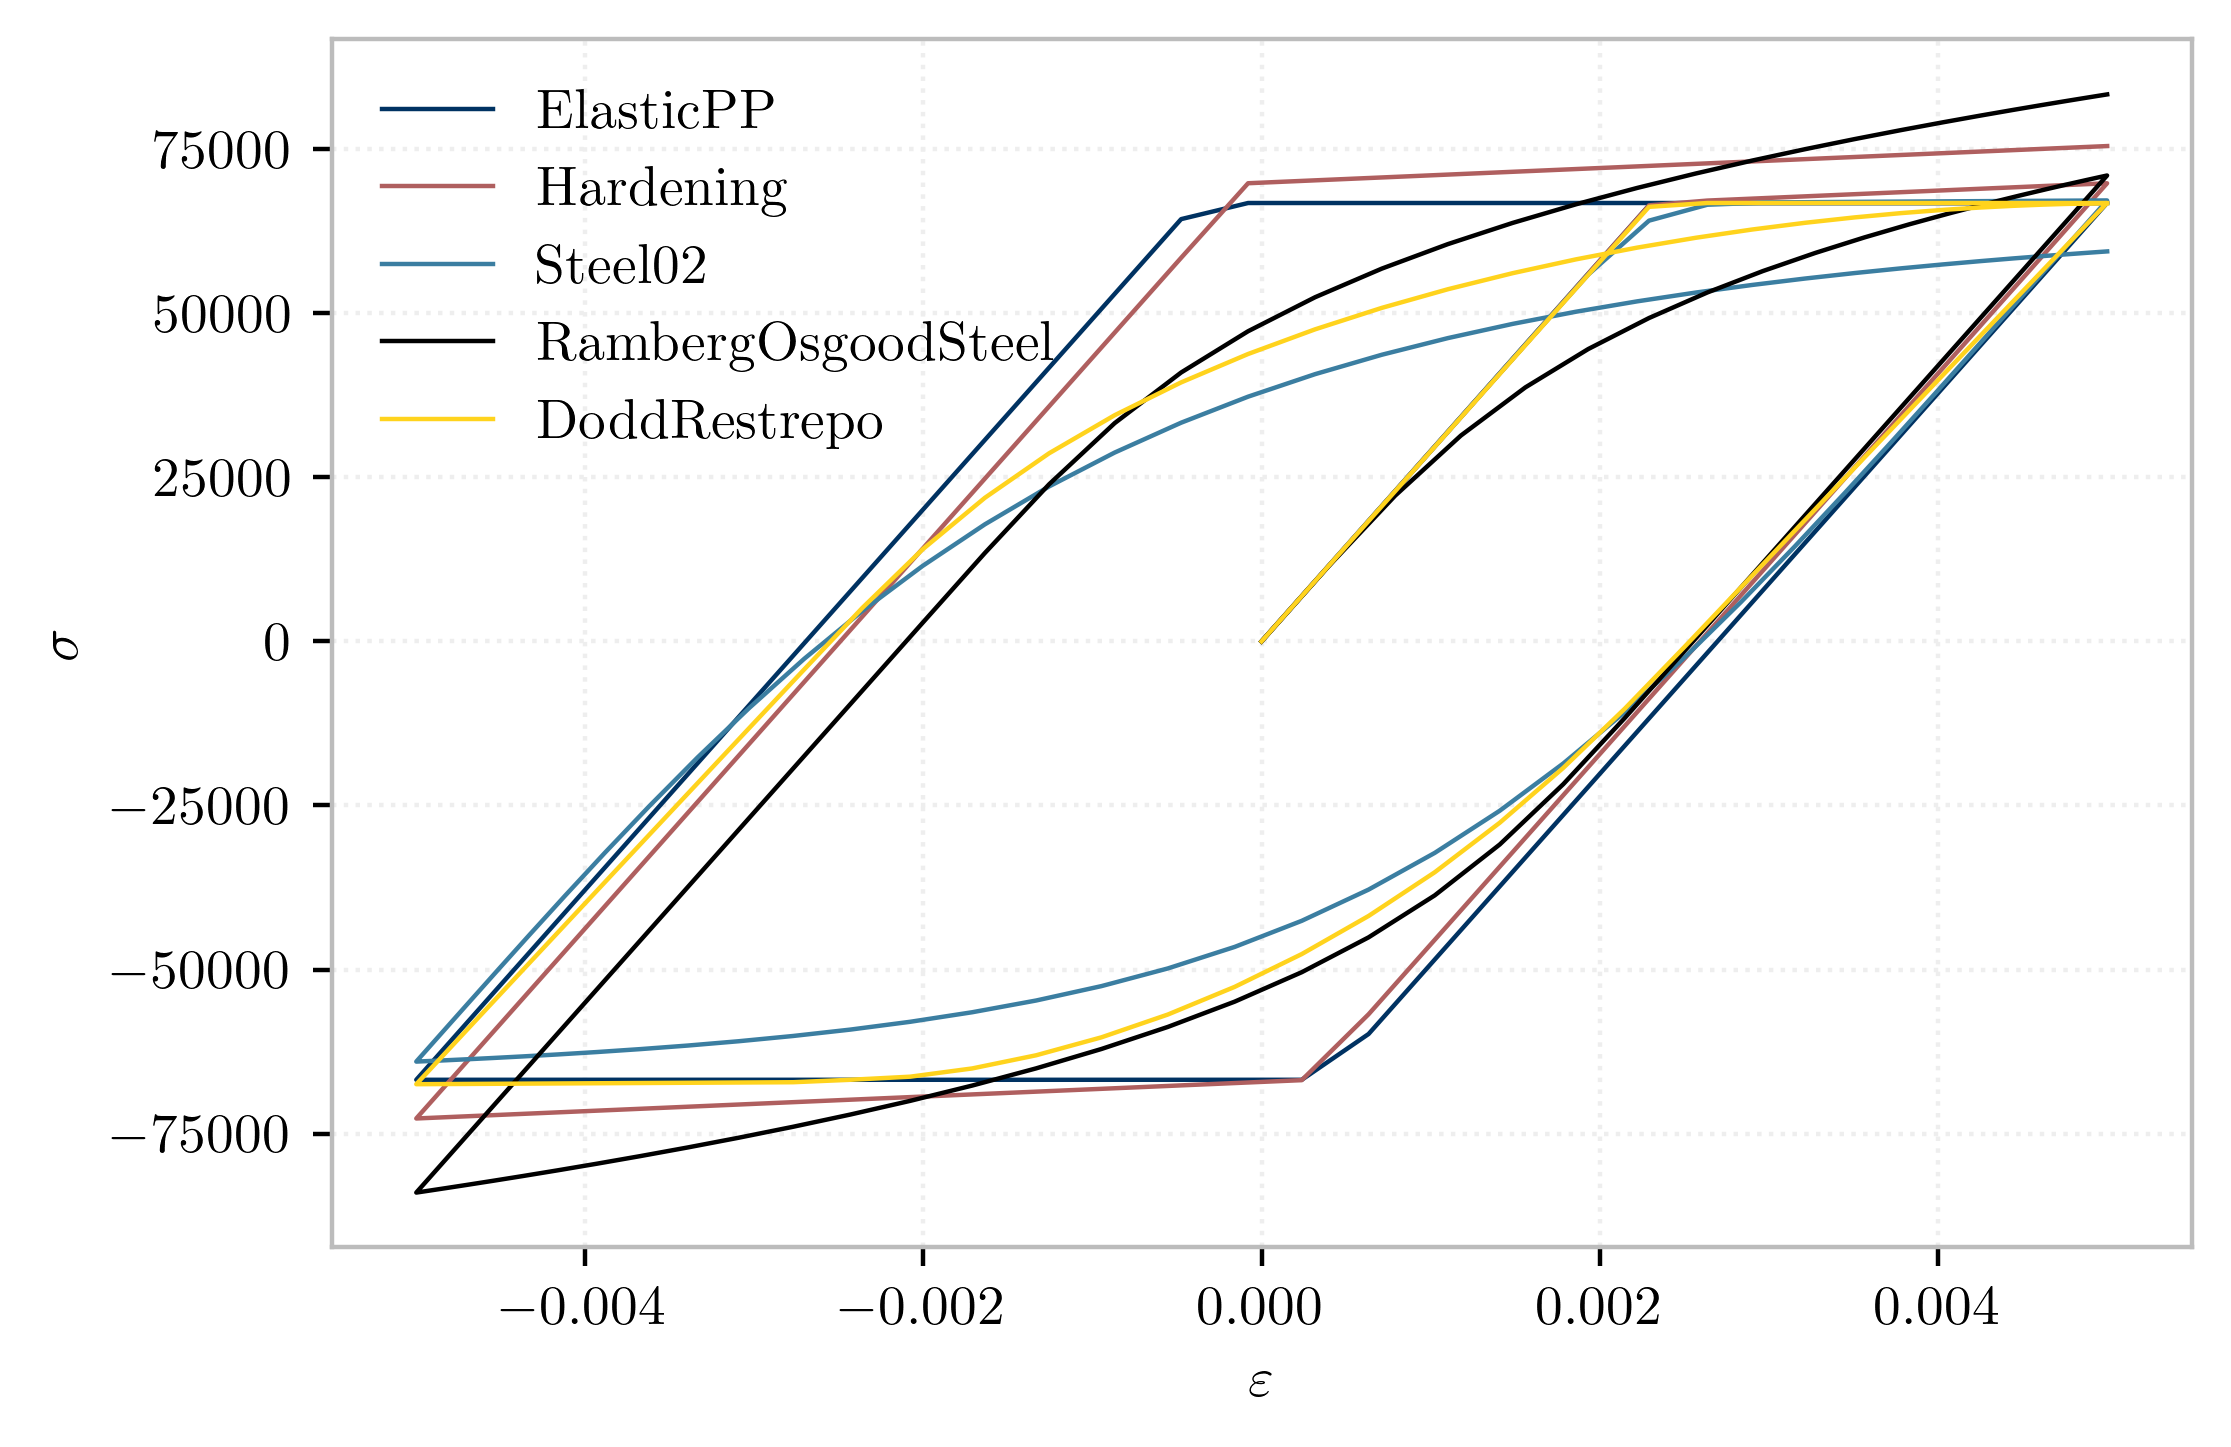

In [7]:
strain = 0.005*sin(linspace(0, 2.5*pi, 100))

fig, ax = plt.subplots()

with uniaxial.ElasticPP(1, Es, Fy/Es) as steel:
    stress = [steel.getStress(e, commit=True) for e in strain]
    ax.plot(strain, stress, label="ElasticPP")


with uniaxial.Hardening(None, Es, Fy, 0.02*Es, 0.02*Es) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Hardening")


with uniaxial.Steel02(None, Fy, Es, Bs, 18.) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Steel02")


with uniaxial.RambergOsgoodSteel(None, Fy, Es, 0.002, 4) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="RambergOsgoodSteel")


esh, esu = 10*Fy/Es, 14*Fy/Es
eshi = (esu + 5*esh)/5
with uniaxial.DoddRestrepo(None, Fy, 1.2*Fy, esh, esu, Es, eshi, 1.1*Fy) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="DoddRestrepo")


# uniaxial.Bond_SP01(1, Fy, Sy=1.0, Fu=1.4*Fy, Su=, b=, R=)

ax.set_xlabel(r"$\varepsilon$")
ax.set_ylabel(r"$\sigma$")
ax.legend();

## Concrete

In [8]:
# nominal concrete compressive strength
fc = -8.5*ksi              # CONCRETE Compressive Strength ksi   (+Tension -Compression)
Ec = 57*ksi*sqrt(-fc/psi)  # Concrete Elastic Modulus

# unconfined concrete
fc1U = fc                  # UNCONFINED concrete (todeschini parabolic model) maximum stress
eps1U = -0.003             # strain at maximum strength of unconfined concrete
fc2U = 0.2*fc1U            # ultimate stress
eps2U = -0.01              # strain at ultimate stress
_lambda = 0.1              # ratio between unloading slope at eps2 and initial slope Ec

# tensile-strength properties
ftU = -0.14*fc1U           # tensile strength +tension
Ets = ftU/0.002            # tension softening stiffness

<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1392ad9370> <Concrete02 object at 0x7f1392b1a140> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f13900abdf0> <Concrete02IS object at 0x7f1392bdf9e0> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1392ad9ab0> <Concrete04 object at 0x7f1392bdf190> 1
<opensees.libOpenSeesRT._UniaxialMaterial object at 0x7f1373ba50b0> <ConcreteCM object at 0x7f1392ae3940> 1


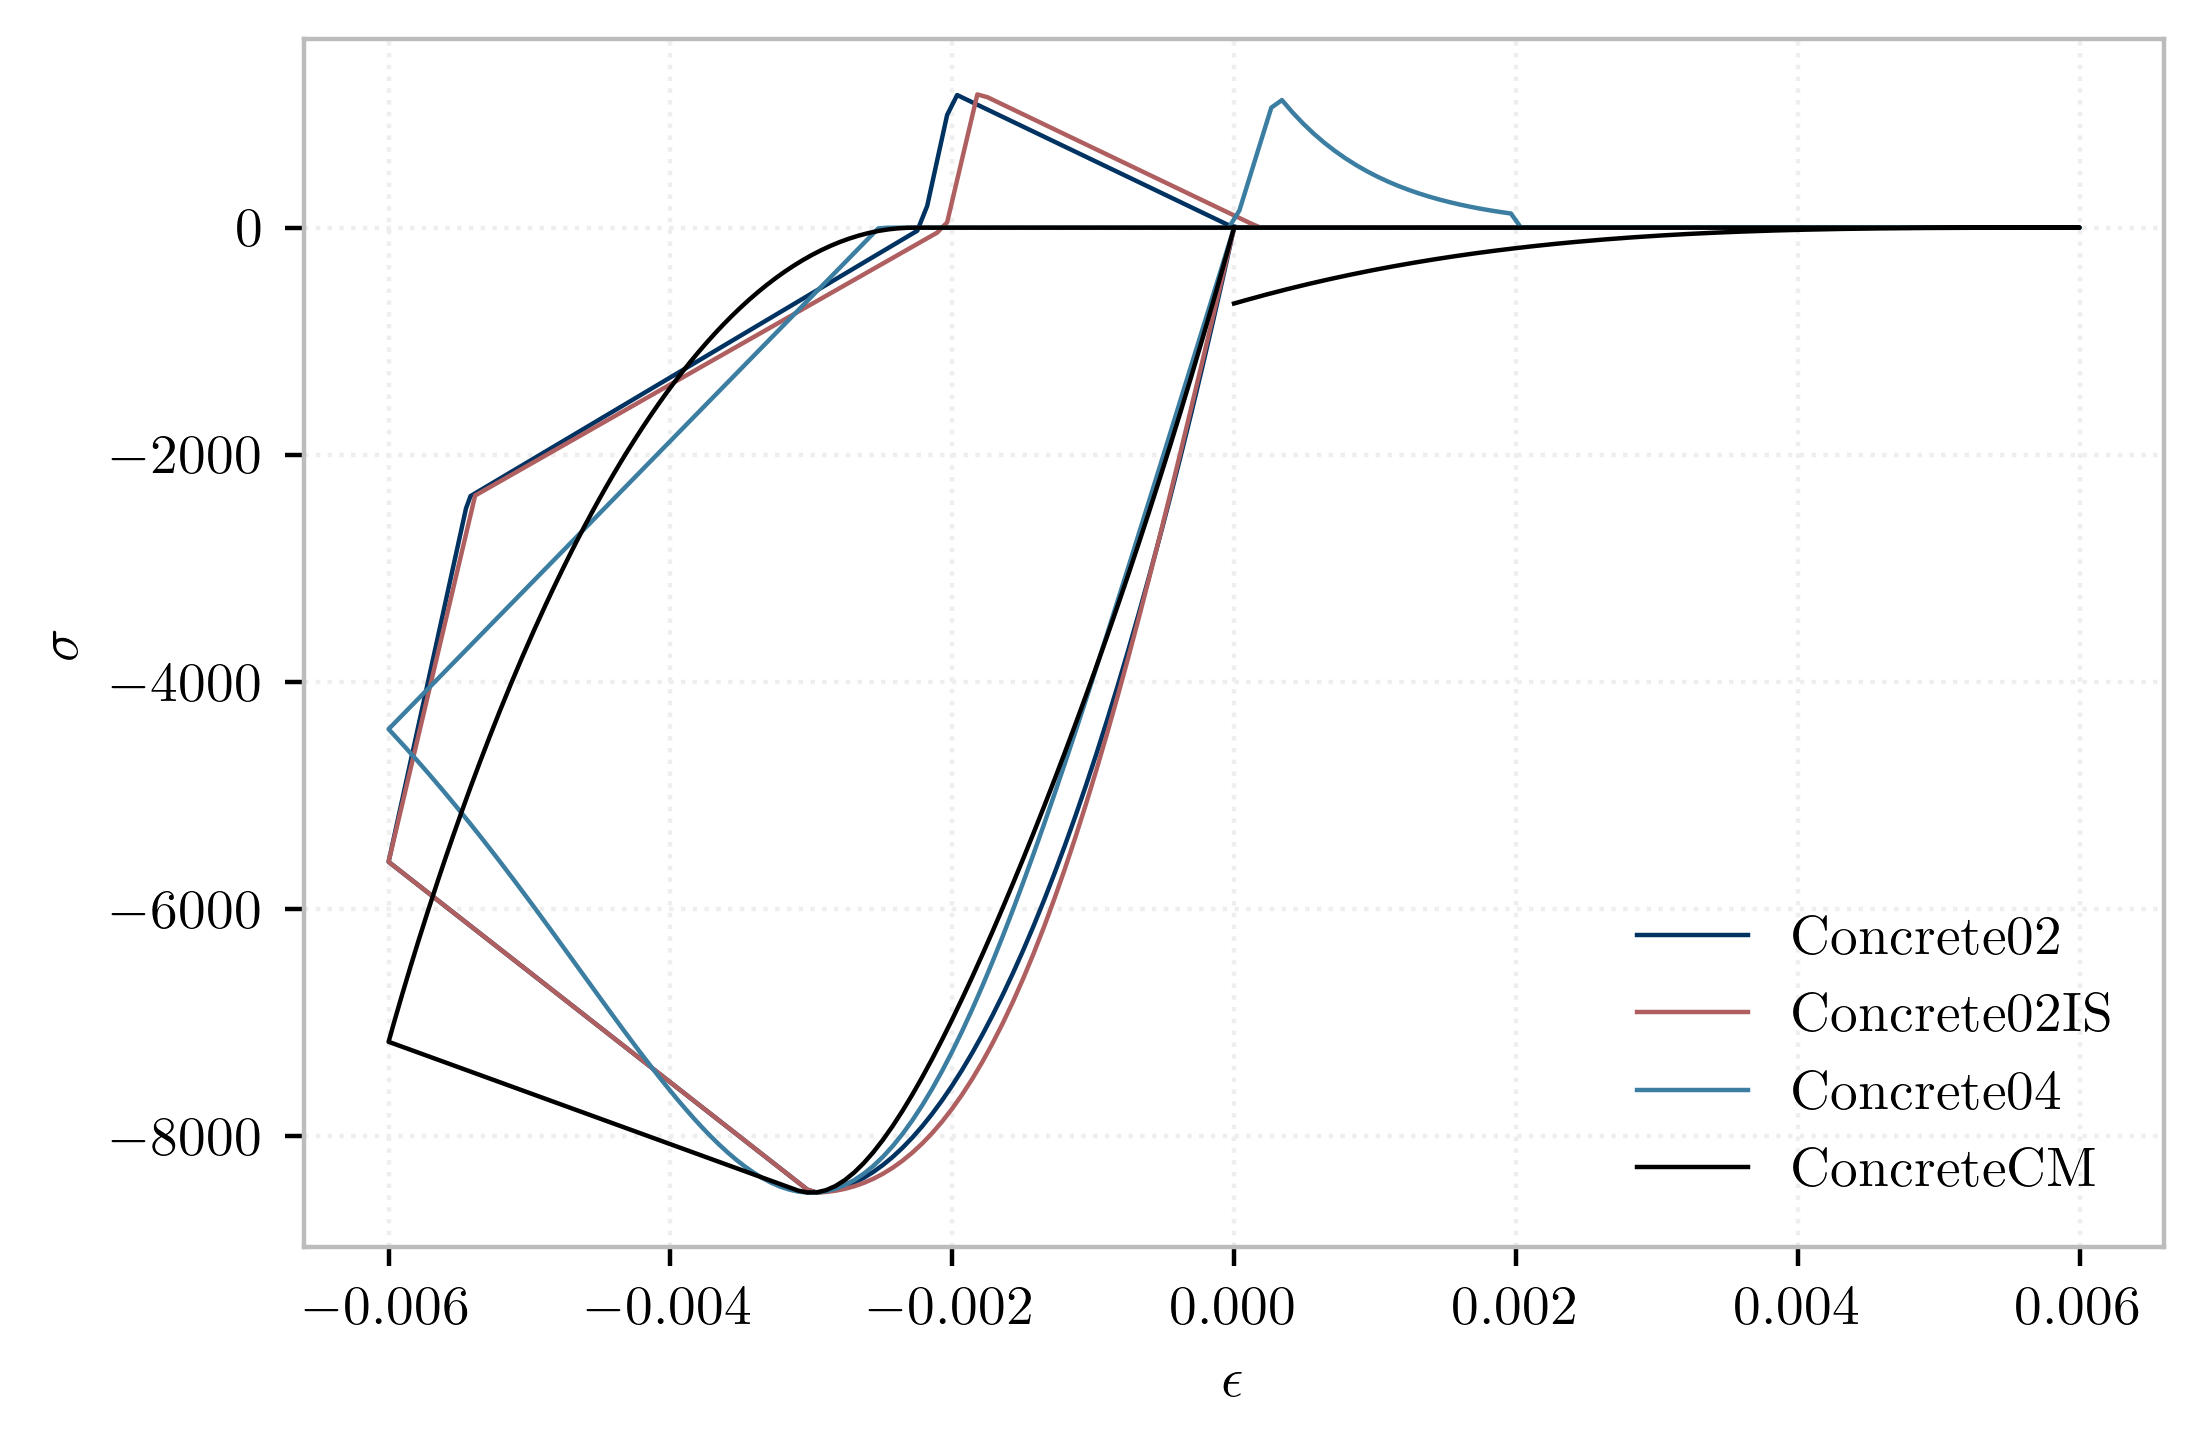

In [9]:
strain  = -0.006*sin(linspace(0, 2*pi, 500))
fig, ax = plt.subplots()

with uniaxial.Concrete02(1, fc1U, eps1U, fc2U, eps2U, _lambda, ftU, Ets) as c:
    ax.plot(strain, [c.getStress(e, commit=True) for e in strain], label="Concrete02")
    
with uniaxial.Concrete02IS(1, Ec, fc1U, eps1U, fc2U, eps2U, [_lambda, ftU, Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="Concrete02IS")

with uniaxial.Concrete04(1, fc1U, eps1U, eps2U, 4e3*ksi, [ftU, ftU/Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="Concrete04")

with uniaxial.ConcreteCM( 1, fc1U, eps1U, 4500*ksi, 7, 1.035, 0.30, 0.00008, 1.2, 10000) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="ConcreteCM")

ax.legend()
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\sigma$");